In [1]:
import pandas as pd
import os, sys
import glob 

import time

import IPython.display as ipd
import librosa
import librosa.display


import soundfile as sf
import scipy.signal as signal
import skimage.io

from fastai.basics import *
from fastai.vision.all import *

print('Version:', sys.version)
print('Python executable:', sys.executable)

Version: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Python executable: /home/francisco/anaconda3/bin/python


In [17]:
file_path = Path("/home/francisco/Documents/UrbanSound challenge/data/")

### Create a list with all the wav files from that folder, it keeps names, directories and parent directories

In [18]:
wav_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(file_path)
             for name in files
             if name.endswith((".wav"))]
len(wav_files)

8732

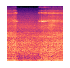

In [19]:
current_file = wav_files[0]
section_data, fs = librosa.core.load(current_file, sr=None)

fig = plt.figure(figsize=[1,1])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
    
mfccs = librosa.feature.melspectrogram(y=section_data, sr=fs,n_mels=128,hop_length=2**10)
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='linear');

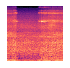

In [20]:
current_file = wav_files[0]
section_data, fs = librosa.core.load(current_file, sr=None)

fig = plt.figure(figsize=[1,1])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

mfccs = librosa.feature.melspectrogram(y=section_data, sr=fs)
#mfccs = np.log(mfccs + 1e-9) #
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='linear');

plt.savefig('est', dpi=500, bbox_inches='tight',pad_inches=0)

In [21]:
def manual_front_fetch(file_name):
    path = '/home/francisco/Documents/UrbanSound challenge/UrbanSound8K.csv'
    class_names = pd.read_csv(path)
    manual_front_time=[]
    #FileBaseName = os.path.splitext(os.path.basename(file_name))[0]
    for i in range(len(class_names)):
        if str(FileBaseName) == str(class_names.iloc[i,0][:-4]):
            manual_front_time = str(class_names.iloc[i,7])
            break
    return manual_front_time

def scale_minmax(X, min=0.0, max=1.0):
    # Scale spectrogram to save it as png
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def melspectrogram_image(y, sr, out, hop_length, n_mels):
    # This is to get rid of the axes and only get the picture 
    fig = plt.figure(figsize=[1,1])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    # use log-melspectrogram and save it as png
    mfccs = librosa.feature.melspectrogram(y=y, sr=sr)#, n_mels=n_mels,
                                            #n_fft=hop_length, hop_length=hop_length)
    librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='linear');
    plt.savefig(out, dpi=500, bbox_inches='tight',pad_inches=0)
    plt.close()
    #mfccs = np.log(mfccs + 1e-9) # add small number to avoid log(0)

#     # min-max scale to fit inside 8-bit range
#     img = scale_minmax(mfccs, 0, 255).astype(np.uint8)
#     img = np.flip(img, axis=0) # put low frequencies at the bottom in image
#     #img = 255-img # invert. make black==more energy
#     BW3layerMapInt = np.zeros( (img.shape[0], img.shape[1], 3), dtype=np.uint8 )
#     for layer in range(3):
#         BW3layerMapInt[:, :, layer] = np.uint8( 255*img)
#     #return BW3layerMapInt
#     #img_for_export = Image.fromarray(BW3layerMapInt, 'RGB')

#     # save as PNG
#     #skimage.io.imsave(out, img)
#     skimage.io.imsave(out, BW3layerMapInt)plt.savefig('est', dpi=500, bbox_inches='tight',pad_inches=0)

### Get MEL-Spectrograms

We will create a new folder to save there all the MEL-Spectrograms

In [22]:
experiment_name='Exp_2_UrbanSound_MEL-Spectrogram'

In [24]:
timestr = time.strftime("%Y%m%d-%H%M%S")
out_folder='/home/francisco/Documents/UrbanSound challenge/data/'+experiment_name+'/'+timestr
if not os.path.exists(out_folder): # Check if folder exists, if not create one
    os.makedirs(out_folder)
    
resample=False
pre_emphasis=False    
feature = 'MEL-spectrogram'    

for current_file in wav_files:
    FileBaseName = os.path.splitext(os.path.basename(current_file))[0]
    y_label=manual_front_fetch(FileBaseName)
    
    # Output FileName
    outFileName = os.path.join(out_folder,str(FileBaseName)+'_'+str(y_label)+'.png')
#     print(outFileName)
    
    # load audio. Using example from librosa
    section_data, fs = librosa.core.load(current_file, sr=None)
    
    # MEL Spectrogram
    n_mels = 128 # number of bins in spectrogram. Height of image
    hop_length = 2**10#4458
    melspectrogram_image(section_data, sr=fs, out=outFileName, hop_length=hop_length, n_mels=n_mels)

print(experiment_name)
print(out_folder)    

Exp_2_UrbanSound_MEL-Spectrogram
/home/francisco/Documents/UrbanSound challenge/data/Exp_2_UrbanSound_MEL-Spectrogram/20211021-212101
